In [1]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
import numpy as np

In [3]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [4]:
from pylab import rcParams
rcParams['figure.figsize']=(14,8)

In [5]:
import sqlite3
sql='select * from playerstats'
con = sqlite3.connect('../players.db')
stats = pd.read_sql(sql,con)

In [8]:
# stats.index = pd.RangeIndex(start=1, stop=77, step=1)

In [9]:
stats

,index,Player,Team,Smp,Swin,Sloss,Swl,Spct,Dmp,Dwin,Dloss,Dwl,Dpct,Twl,Trwl,Cmp,Cwin,Closs,Cwl,Cpct
0,0,John DiToro,America,3,2,1,2-1,66.67,2,1,1,1-1,50.00,0-0,0-0,5,3,2,3-2,60.00
1,1,Charlie Williams,America,8,6,2,6-2,75.00,13,6,7,6-7,46.15,0-0,0-0,21,12,9,12-9,57.14
2,2,Reed Pierce,America,4,4,0,4-0,100.00,6,1,5,1-5,16.67,0-0,0-0,10,5,5,5-5,50.00
3,3,Corey Deuel,America,15,7,8,7-8,46.67,27,14,13,14-13,51.85,5-3,2-0,52,28,24,28-24,53.85
4,4,Mike Davis,America,2,1,1,1-1,50.00,2,1,1,1-1,50.00,2-0,1-1,8,5,3,5-3,62.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77,77,Allison Fisher,Europe,1,0,1,0-1,0.00,2,0,2,0-2,0.00,0-0,0-0,3,0,3,0-3,0.00
78,78,Mika Immonen,Europe,33,16,17,16-17,48.48,39,22,17,22-17,56.41,3-3,1-1,80,42,38,42-38,52.50
79,79,Steve Knight,Europe,7,4,3,4-3,57.14,11,4,7,4-7,36.36,0-0,0-0,18,8,10,8-10,44.44
80,80,Vincent Facquet,Europe,2,0,2,0-2,0.00,1,1,0,1-0,100.00,0-0,0-0,3,1,2,1-2,33.33


In [10]:
def rank(n,cat,df=stats,team=None,limit=None):
    if team:
        df = df[df.Team.str.contains(team.title())]
    if limit:
        df = df[df[cat[0]+'win']>=limit]
    df = df.nlargest(n,cat)
#     if viz == True:
#         viz()
    return df

In [11]:
rank(100,'Cpct',team=None,limit=10)

,index,Player,Team,Smp,Swin,Sloss,Swl,Spct,Dmp,Dwin,Dloss,Dwl,Dpct,Twl,Trwl,Cmp,Cwin,Closs,Cwl,Cpct
50,50,Karl Boyes,Europe,6,4,2,4-2,66.67,12,10,2,10-2,83.33,3-1,0-0,22,17,5,17-5,77.27
70,70,Albin Ouschan,Europe,5,4,1,4-1,80.00,9,7,2,7-2,77.78,2-1,0-0,17,13,4,13-4,76.47
63,63,Niels Feijen,Europe,22,13,9,13-9,59.09,36,25,11,25-11,69.44,6-4,0-0,68,44,24,44-24,64.71
23,23,Earl Strickland,America,26,14,12,14-12,53.85,36,24,12,24-12,66.67,3-2,2-0,69,43,26,43-26,62.32
71,71,Jayson Shaw,Europe,8,4,4,4-4,50.00,7,4,3,4-3,57.14,3-0,0-0,18,11,7,11-7,61.11
43,43,Ralf Souquet,Europe,34,21,13,21-13,61.76,47,29,18,29-18,61.70,5-4,1-1,92,56,36,56-36,60.87
1,1,Charlie Williams,America,8,6,2,6-2,75.00,13,6,7,6-7,46.15,0-0,0-0,21,12,9,12-9,57.14
27,27,Johnny Archer,America,30,17,13,17-13,56.67,50,27,23,27-23,54.00,5-4,1-1,91,50,41,50-41,54.95
3,3,Corey Deuel,America,15,7,8,7-8,46.67,27,14,13,14-13,51.85,5-3,2-0,52,28,24,28-24,53.85
57,57,Darren Appleton,Europe,14,10,4,10-4,71.43,25,10,15,10-15,40.00,5-3,0-0,47,25,22,25-22,53.19


Start Plotting

Text(0.5, 0, 'Combined Matches Played')

Text(0.5, 1.0, 'Players with the Most Combined Wins')

([<matplotlib.axis.XTick at 0x1b9aab96e48>,
 <a list of 12 Text xticklabel objects>)

([<matplotlib.axis.YTick at 0x1b9aaba1cf8>,
 <a list of 7 Text yticklabel objects>)

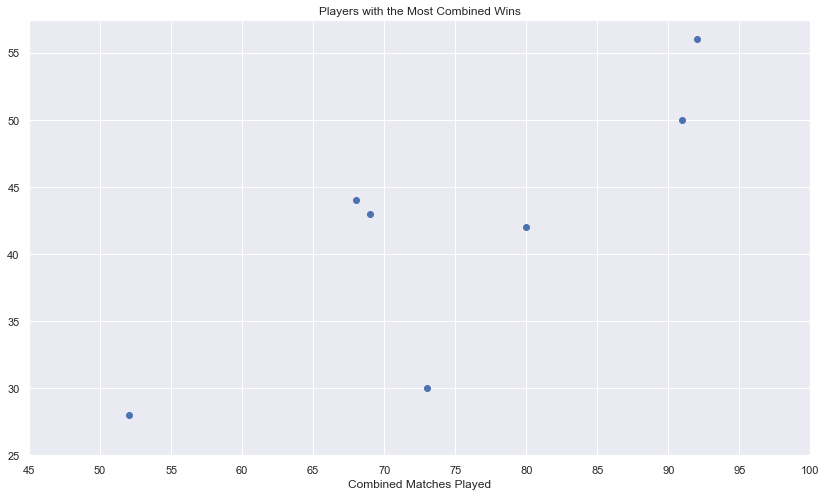

In [14]:
frame = stats.nlargest(7,'Cwin')

frame.index= pd.RangeIndex(start=1, stop=len(frame)+1, step=1)

from pylab import rcParams
rcParams['figure.figsize']=(14,8)

x=list(frame['Cmp'])
y=list(frame['Cwin'])
labels=list(frame['Player'])

plt.plot(x,y,linestyle='none',marker='.',markersize=12)
plt.xlabel('Combined Matches Played')
plt.title('Players with the Most Combined Wins')
plt.xticks(np.arange(45,105,5))
plt.yticks(np.arange(25,60,5))

n= list(frame['Cpct'])
# for i, txt in enumerate(n):
#     plt.annotate('{}\n    {}%'.format(labels[i],txt),   (frame.ix[i+1,'Cmp']+1,frame.ix[i+1,'Cwin']-1)  )

In [15]:
def viz(n=7,df=stats,x='Cmp',cat='Cwin',kind='scatter',rot=0,limit=0,annot=None,team=None):
    if team:
        frame = df[df['Team'].str.contains(team)]
        frame.index = pd.RangeIndex(start=1, stop=len(frame)+1, step=1)
        print(len(frame))
    
    frame = stats[stats[x]>=limit].nlargest(n,cat)
    frame.index= pd.RangeIndex(start=1, stop=len(frame)+1, step=1)
    print(len(frame))

    frame.plot(x,cat,kind)
    minx = min(frame[x]-10)//5*5+5
    maxx = max(frame[x]+10)//5*5+5
    miny = min(frame[cat]-10)//5*5+5
    maxy = max(frame[cat]+10)//5*5+5
    plt.xticks(np.arange(minx,maxx,5))
    plt.yticks(np.arange(miny,maxy,5))

    plt.xlabel(x)
    plt.title('Top {} players with the Most {}'.format(n,cat))

    labels=list(frame['Player'])
    n= list(frame[annot])
    for i, txt in enumerate(n):
        plt.annotate('{}\n    {} = {}'.format(labels[i],annot,txt),   (frame.loc[i+1,x]+1,frame.loc[i+1,cat]-1),rotation=rot  )

In [16]:
def viz(n=7,df=stats,x='Cmp',cat='Cwin',kind='scatter',rot=0,limit=0,annot=None,team=None):
    if team:
        df = df[df['Team'].str.contains(team)]
        df.index = pd.RangeIndex(start=1, stop=len(df)+1, step=1)
        print(len(df))
    
    df = df[df[x]>=limit].nlargest(n,cat)
    df.index= pd.RangeIndex(start=1, stop=len(df)+1, step=1)
    print(len(df))

    df.plot(x,cat,kind)
    minx = min(df[x]-10)//5*5+5
    maxx = max(df[x]+10)//5*5+5
    miny = min(df[cat]-10)//5*5+5
    maxy = max(df[cat]+10)//5*5+5
    plt.xticks(np.arange(minx,maxx,5))
    plt.yticks(np.arange(miny,maxy,5))

    plt.xlabel(x)
    plt.title('Top {} players with the Most {}'.format(n,cat))

    labels=list(df['Player'])
    n= list(df[annot])
    for i, txt in enumerate(n):
        plt.annotate('{}\n    {} = {}'.format(labels[i],annot,txt),   (df.loc[i+1,x]+1,df.loc[i+1,cat]-1),rotation=rot  )

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


7


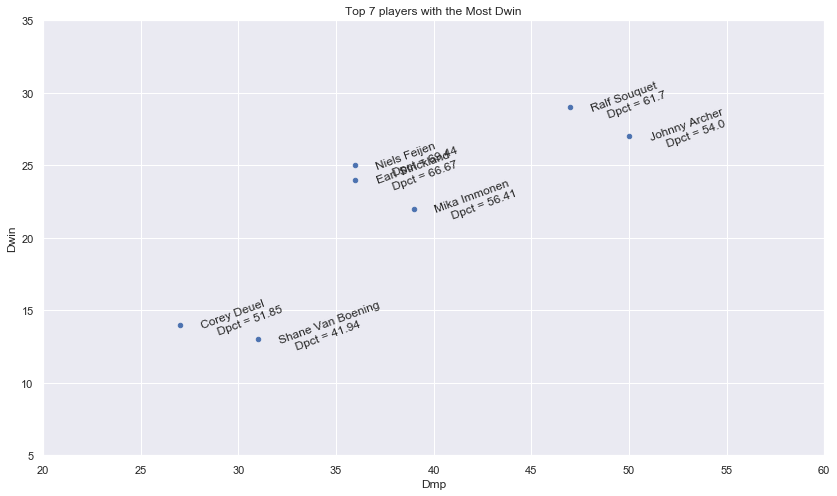

In [17]:
viz(x='Dmp',cat='Dwin',annot='Dpct',rot=20)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


7


KeyError: None

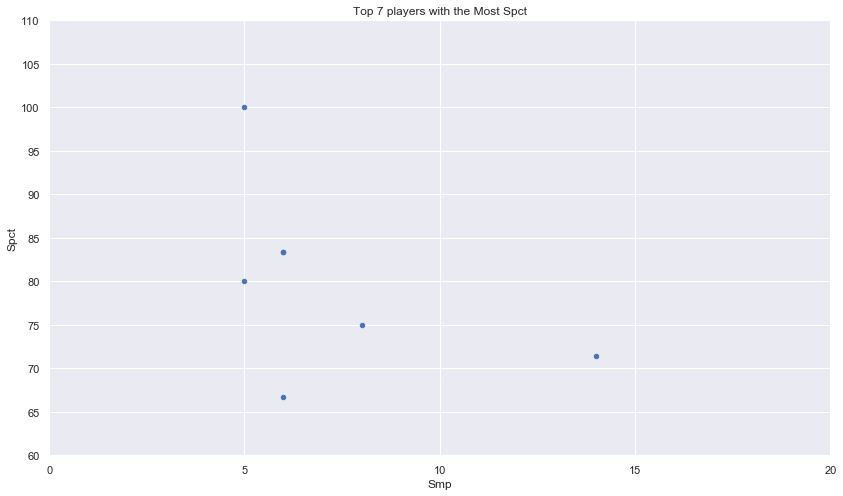

In [21]:
viz(x='Smp',cat='Spct',limit=5)

Custom examples with additional annotations

Text(0.5, 0, 'Doubles Matches Played')

Text(0, 0.5, 'Doubles Win Percentage')

Text(0.5, 1.0, 'Players with the Highest Doubles Win Percentage \n (must have at least 10 matches)')

([<matplotlib.axis.XTick at 0x1b9ab613438>,
 <a list of 11 Text xticklabel objects>)

([<matplotlib.axis.YTick at 0x1b9ab6172b0>,
 <a list of 7 Text yticklabel objects>)

AttributeError: 'DataFrame' object has no attribute 'ix'

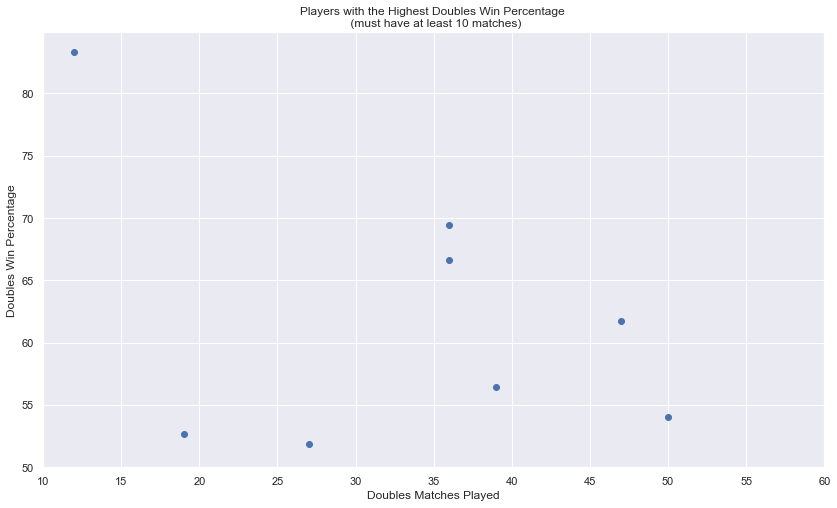

In [22]:
frame = stats[stats['Dmp']>=10].nlargest(8,'Dpct')

frame.index= pd.RangeIndex(start=1, stop=9, step=1)

# from pylab import rcParams
# rcParams['figure.figsize']=(14,8)

x=list(frame['Dmp'])
y=list(frame['Dpct'])
labels=list(frame['Player'])

plt.plot(x,y,linestyle='none',marker='.',markersize=12)
plt.xlabel('Doubles Matches Played')
plt.ylabel('Doubles Win Percentage')
plt.title('Players with the Highest Doubles Win Percentage \n (must have at least 10 matches)')
plt.xticks(np.arange(10,65,5))
plt.yticks(np.arange(50,85,5))

n= list(frame['Dpct'])
for i, txt in enumerate(n):
    plt.annotate('{}\n  ({} wins, {}%)\n  {}%'.format(labels[i],x[i],round(y[i],0),txt), (frame.ix[i+1,'Dmp']+1,frame.ix[i+1,'Dpct']-1))

In [ ]:
frame = stats[stats['Cmp']>=10].nlargest(10,'Cpct')

frame.index= pd.RangeIndex(start=1, stop=11, step=1)

# from pylab import rcParams
# rcParams['figure.figsize']=(14,8)

x=list(frame['Cmp'])
y=list(frame['Cpct'])
labels=list(frame['Player'])

colors = frame['Spct']
sizes = frame['Dpct']

plt.scatter(x, y, c=colors, s=sizes,cmap='viridis')
plt.colorbar();  # show color scale
# plt.plot(x,y,linestyle='none',marker='.',markersize=12)
plt.xlabel('Combined Matches Played')
plt.ylabel('Combined Win Percentage')
plt.title('Players with the Highest Combined Win Percentage \n (must have at least 10 matches)')
plt.xticks(np.arange(10,105,5))
plt.yticks(np.arange(50,85,5))

n= list(frame['Cpct'])
for i, txt in enumerate(n):
    plt.annotate('{}\n    {}%'.format(labels[i],txt), (frame.ix[i+1,'Cmp']+1,frame.ix[i+1,'Cpct']-1))